<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Linear Regression (Boston House price)</h3>
    <h4 align="center"><a href="https://github.com/AliBinary">Ali Ghanbari</a></h5>
</div>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Boston House Dataset

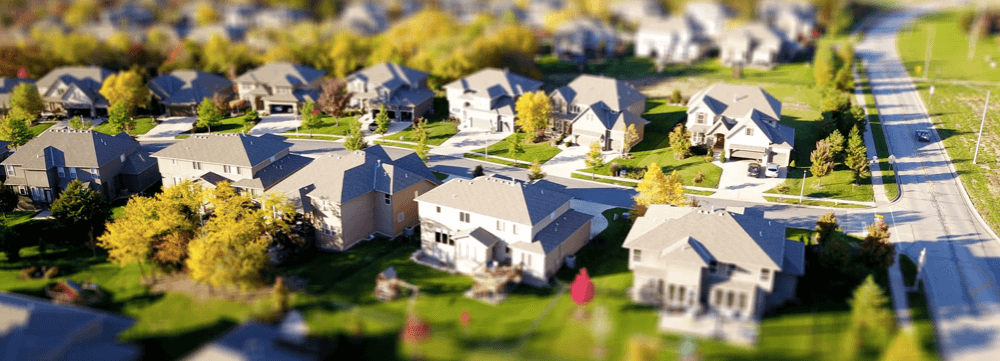

In [ ]:
#loads Boston dataset
boston = pd.read_csv('./boston_house_prices.csv')



The problem that we are going to solve here is that given a set of features that describe a house in Boston, our machine learning model must predict the house price. To train our machine learning model with boston housing data, we will be using scikit-learn’s boston dataset.

In this dataset, each row describes a boston town or suburb. There are 506 rows and 13 attributes (features) with a target column (price). https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names


### Variables
#### There are 14 attributes in each case of the dataset. They are:
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable ( I if tract bounds river; O otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
boston.info()

In [ ]:
boston.columns

In [ ]:
# Make a copy
data = boston.copy()

In [ ]:
# See head of the dataset
data.head()

In [ ]:
#Adding target variable to dataframe
data['PRICE'] = boston['MEDV']
data.drop('MEDV', axis=1, inplace=True)
# Median value of owner-occupied homes in $1000s

In [ ]:
data.head()

In [ ]:
#Check the shape of dataframe
data.shape

In [ ]:
data.columns

In [ ]:
data.dtypes

In [ ]:
# Identifying the unique number of values in the dataset
data.nunique()

In [ ]:
# Check for missing values
data.isnull().sum()

In [ ]:
# Viewing the data statistics
data.describe()

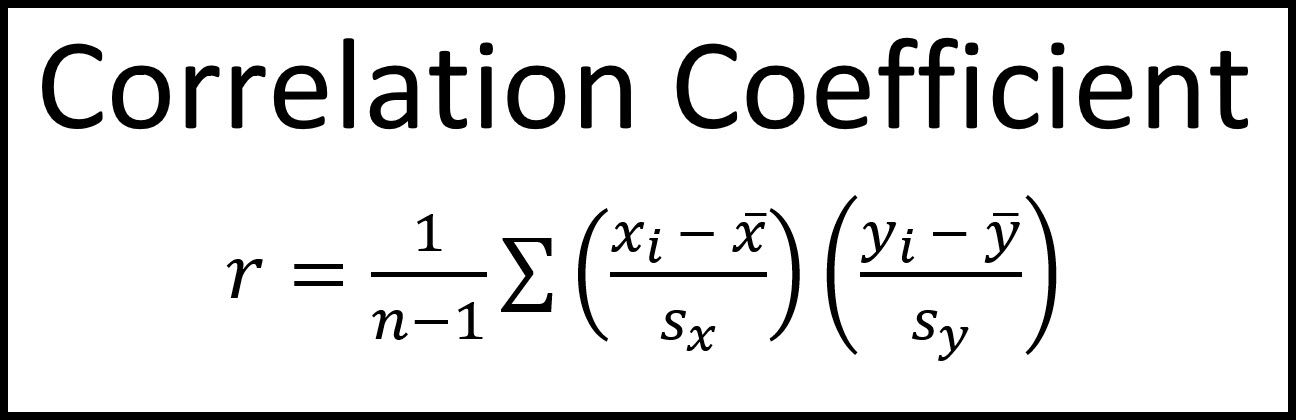

In [ ]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

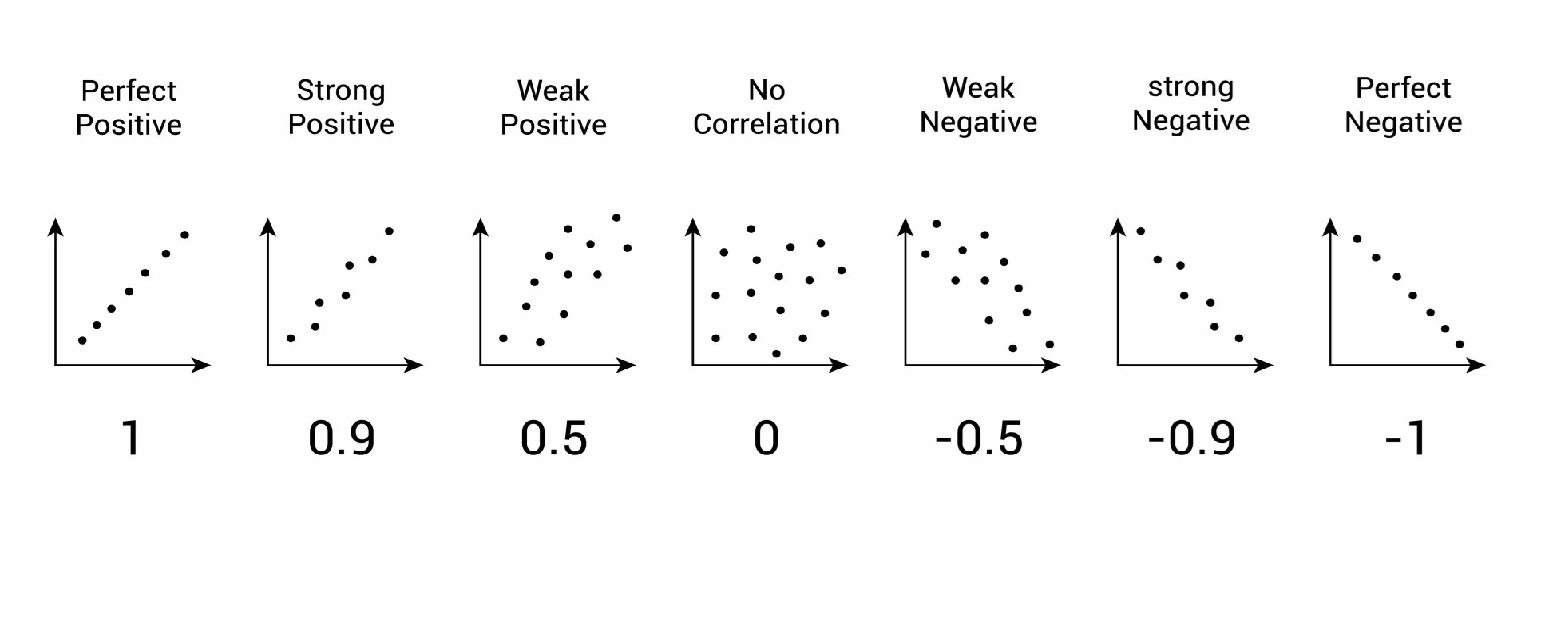

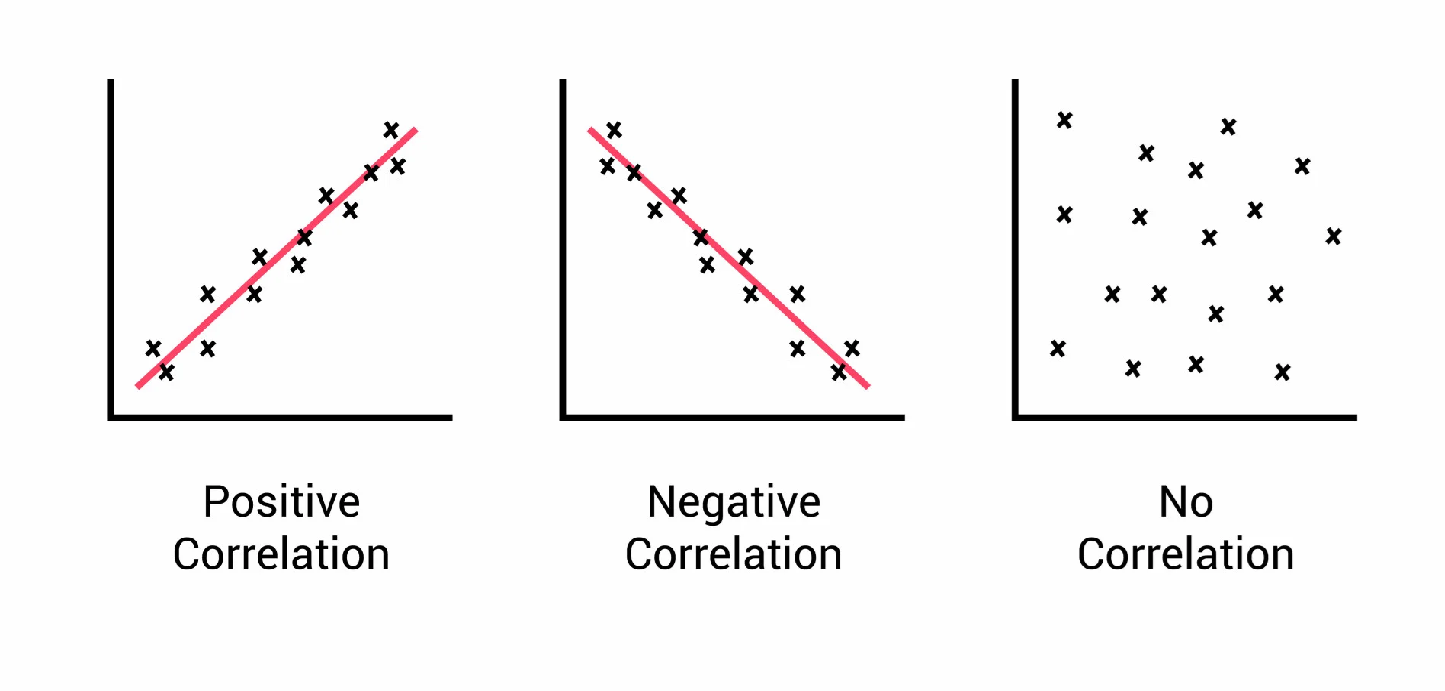

In [ ]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
corr

# Simple vs. Multiple Linear Regression

## Simple Linear Regression (SLR)

In [ ]:
X = data[['RM']]
#X = data["RM"].values.reshape((-1,1))

y = data['PRICE']

In [ ]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [ ]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
slr = LinearRegression()

# Train the model using the training sets 
slr.fit(X_train, y_train)

In [ ]:
slr.intercept_

In [ ]:
slr.coef_

In [ ]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,slr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

## Model (SLR) Evaluation

In [ ]:
from sklearn import metrics

In [ ]:
# Model prediction on train data
y_pred = slr.predict(X_train)



𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 


In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
sns.displot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Multiple Linear Regression (MLR)

In [ ]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [ ]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [ ]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
mlr = LinearRegression()

# Train the model using the training sets 
mlr.fit(X_train, y_train)

In [ ]:
mlr.intercept_

In [ ]:
mlr.coef_

In [ ]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,mlr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

## Model(MLR) Evaluation

In [ ]:
# Model prediction on train data
y_pred = mlr.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
sns.displot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial regression 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)

# transform the features to higher degree features.
X_train_quadratic = poly_features.fit_transform(X_train)

# fit the transformed features to Linear Regression
quadratic = LinearRegression()

quadratic.fit(X_train_quadratic, y_train)

# predicting on training data-set
y_train_predicted = quadratic.predict(X_train_quadratic)

# predicting on test data-set
y_test_predicted = quadratic.predict(poly_features.fit_transform(X_test))

In [ ]:
metrics.r2_score(y_train, y_train_predicted)

In [ ]:
metrics.r2_score(y_test, y_test_predicted)

In [ ]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=3)
   
# transform the features to higher degree features.
X_train_cubic = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
cubic = LinearRegression()

cubic.fit(X_train_cubic, y_train)
     
# predicting on training data-set
y_train_predicted = cubic.predict(X_train_cubic)
   
# predicting on test data-set
y_test_predicted = cubic.predict(poly_features.fit_transform(X_test))

In [ ]:
metrics.r2_score(y_train, y_train_predicted)

In [ ]:
metrics.r2_score(y_test, y_test_predicted)